In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot

pd.options.plotting.backend = "plotly"

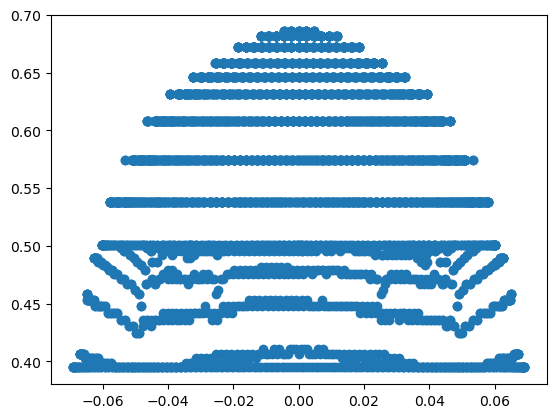

In [10]:
data = pd.read_csv("/home/juleslecoustre/Documents/TJunction/cold_inletT.csv")
data["R"] = (data["Z"]**2+data["Y"]**2)**0.5
# Variable names
variable_names = ['U', 'V', 'W']
fig,ax = plt.subplots()
ax.scatter(data["Z"] ,data["U"])

In [74]:
def plot_probes(exp_path,profiles_path,iter,axis="Y",var_name="V"):
  Ub = 0.9744
  Dc = 0.140
  operations = {
    "U":[1/Ub],
    "V":[1/Ub],
    "uu":[5/Ub**2],
    "vv":[5/Ub**2],
    "uv":[16/Ub**2]
  }
  axis_dict = {
    "Y":"H",
    "Z":"V"
  }
  cfd_var_dict = {
    "U":"Vel_avg_x", 
    "V":"Vel_avg_y",
    "uu":"UU_avg", 
    "vv":"VV_avg",
    "uv":"UV_avg"
  }
  fig,ax = plt.subplots()
  axis_cfd = var_name.lower() #axis name is lowercase in profile
  for i in range(1,5):
    name = "Probe{}{}.csv".format(i,axis)
    exp_data = pd.read_csv(exp_path.joinpath(name),sep=";",decimal=",")
    profile_name = "{}p6D{}_{}.csv".format(i,axis_dict[axis],iter)
    data = pd.read_csv(profiles_path.joinpath(profile_name))
    data.columns = [col.replace(' ','') for col in data.columns]
    fact = operations[var_name]
    if "uu" == var_name:
      data["UU_avg"] = data["UU_avg"] + data["U_squared"] - data["Vel_avg_x"]**2
    if "vv" == var_name:
      data["VV_avg"] = data["VV_avg"] + data["V_squared"] - data["Vel_avg_y"]**2
    data["op"] = fact*data[cfd_var_dict[var_name]] + float(i) + 0.6
    exp_data["op"] = fact*exp_data[var_name] + float(i) + 0.6
    if i == 1:
      ax.plot(data["op"],data["y"]/Dc,c="blue",label="STRUCT")
      ax.plot(exp_data["op"],exp_data["y"]/(1000*Dc),c="orange",marker="o",label="Experiment")
    else:
      ax.plot(data["op"],data["y"]/Dc,c="blue")
      ax.plot(exp_data["op"],exp_data["y"]/(1000*Dc),c="orange",marker="o")
  ax.legend()


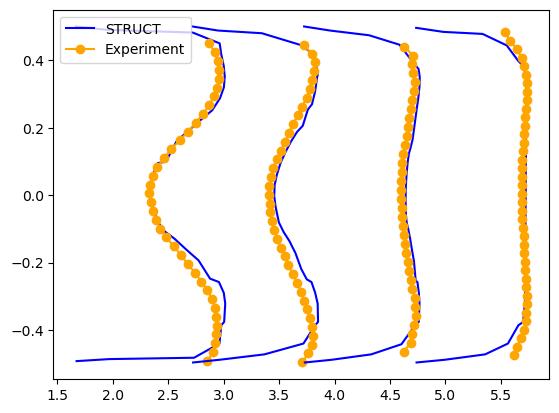

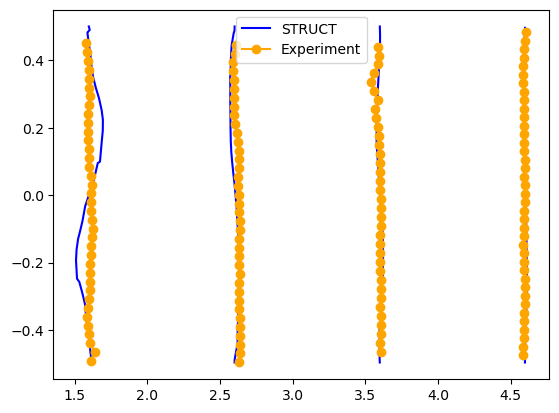

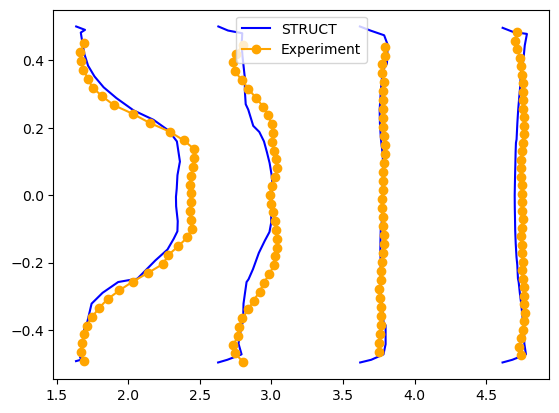

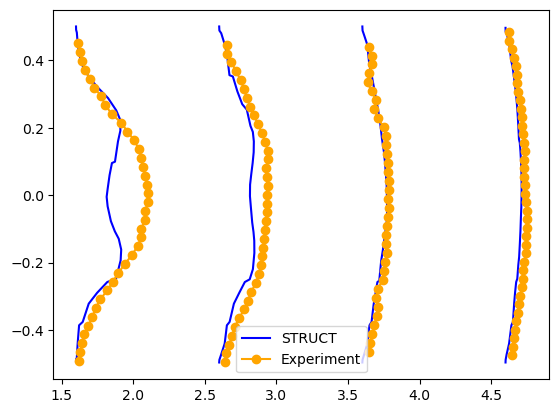

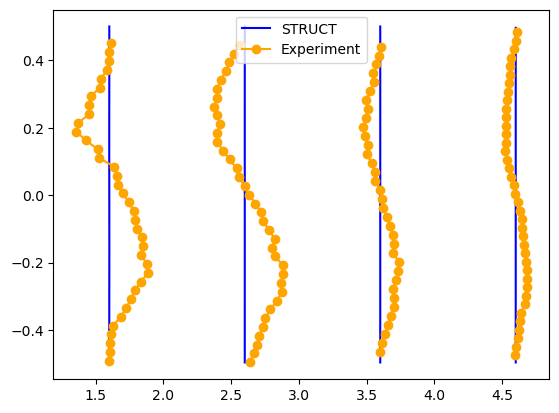

In [75]:
exp_path = Path("/home/juleslecoustre/Documents/TJunction/")
profile_path = Path("/home/juleslecoustre/Documents/Acqua/profiles/")
iter = 57000
variables = ["U","V","uu","vv","uv"]
for var in variables:
  plot_probes(exp_path,profile_path,iter,axis="Y",var_name=var)
